In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
! apt install cm-super

In [4]:
import os, json

import numpy as np, pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
DRIVE_PATH = '/content/gdrive/MyDrive/School/LING581/final'

Mounted at /content/gdrive


In [6]:
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [7]:
WIDTH = 6.30045
# Obtained following https://blog.timodenk.com/exporting-matplotlib-plots-to-latex/
# \usepackage{layouts}
# \printinunitsof{in}\prntlen{\textwidth}

# Embedding training

In [8]:
train_embeddings_epoch_losses_path = 'train-embeddings_epoch-losses'

with open(os.path.join(DRIVE_PATH, train_embeddings_epoch_losses_path + '.json'), 'r') as file:
  train = json.load(file)

train_df = pd.DataFrame(train)
train_df.index = train_df.index.rename('epoch') + 1

In [ ]:
train_df

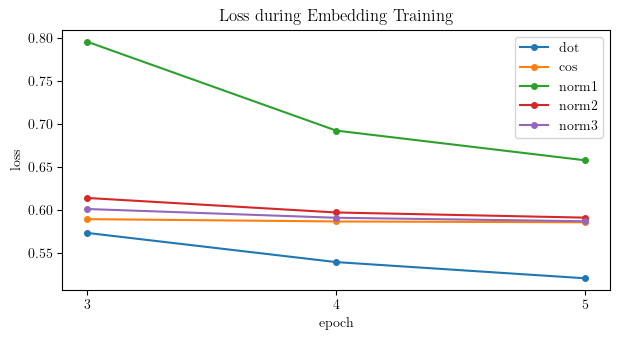

In [19]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(WIDTH, 3.5))

# ax = axs[0]
xlabels = np.arange(3, train_df.index[-1] + 1)
models = ['dot', 'cos', 'norm1', 'norm2', 'norm3']
train_df.loc[xlabels, models].plot(ax=ax, marker='o', markersize=4)
ax.set_xticks(xlabels)
ax.set_ylabel('loss')
ax.set_title('Loss during Embedding Training')

# The plots for clip-norm are almost identical to without clipping
# ax = axs[1]
# xlabels = np.arange(3, 5+1)
# models = [model + '_clip-norm' for model in models]
# train_df.loc[xlabels, models].plot(ax=ax, marker='o', markersize=4)
# ax.set_xticks(xlabels)

fig.tight_layout()
fig.show()

fig.savefig('embedding-training-loss.pgf')

### Latex

In [11]:
s = train_df.style
s.clear()
s.format('{:.3f}')
s.format_index(escape='latex', axis=1)
s.to_latex()

'\\begin{tabular}{lrrrrrrrrrr}\n & dot & cos & norm1 & norm2 & norm3 & dot\\_clip-norm & cos\\_clip-norm & norm1\\_clip-norm & norm2\\_clip-norm & norm3\\_clip-norm \\\\\nepoch &  &  &  &  &  &  &  &  &  &  \\\\\n1 & 1.255 & 0.653 & 5.394 & 1.224 & 0.910 & 1.250 & 0.652 & 5.425 & 1.226 & 0.910 \\\\\n2 & 0.663 & 0.600 & 1.194 & 0.671 & 0.633 & 0.662 & 0.600 & 1.193 & 0.671 & 0.633 \\\\\n3 & 0.573 & 0.589 & 0.796 & 0.614 & 0.601 & 0.573 & 0.589 & 0.796 & 0.614 & 0.601 \\\\\n4 & 0.539 & 0.586 & 0.692 & 0.597 & 0.591 & 0.539 & 0.586 & 0.693 & 0.597 & 0.591 \\\\\n5 & 0.520 & 0.585 & 0.658 & 0.591 & 0.587 & 0.520 & 0.585 & 0.658 & 0.591 & 0.587 \\\\\n\\end{tabular}\n'

# Embedding testing

In [12]:
test_embeddings_stats_path = 'test-embeddings_stats'

with open(os.path.join(DRIVE_PATH, test_embeddings_stats_path + '.json'), 'r') as file:
  test = json.load(file)

test_val_losses_df = pd.DataFrame({name : test[name]['val_losses'] for name in test.keys()})
test_val_losses_df.index = test_val_losses_df.index.rename('epoch') + 1

stat_names = test[next(iter(test.keys()))]['stats'].keys()
test_stats_df = pd.DataFrame(
  {stat_name : [test[name]['stats'][stat_name] for name in test.keys()]
    for stat_name in stat_names},
  index=test.keys())

In [ ]:
test_val_losses_df

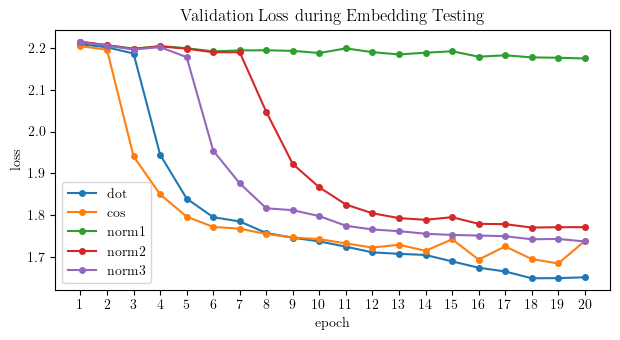

In [20]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(WIDTH, 3.5))

# ax = axs[0]
xlabels = np.arange(test_val_losses_df.index[0], test_val_losses_df.index[-1] + 1)
models = ['dot', 'cos', 'norm1', 'norm2', 'norm3']
test_val_losses_df.loc[xlabels, models].plot(ax=ax, marker='o', markersize=4)
ax.set_xticks(xlabels)
ax.set_ylabel('loss')
ax.set_title('Validation Loss during Embedding Testing')

# The plots for clip-norm are very similar to without clipping
# ax = axs[1]
# xlabels = np.arange(test_val_losses_df.index[0], test_val_losses_df.index[-1] + 1)
# models = [model + '_clip-norm' for model in models]
# test_val_losses_df.loc[xlabels, models].plot(ax=ax, marker='o', markersize=4)
# ax.set_xticks(xlabels)

fig.tight_layout()
fig.show()

fig.savefig('validation-loss_embedding-testing.pgf')

In [ ]:
test_stats_df

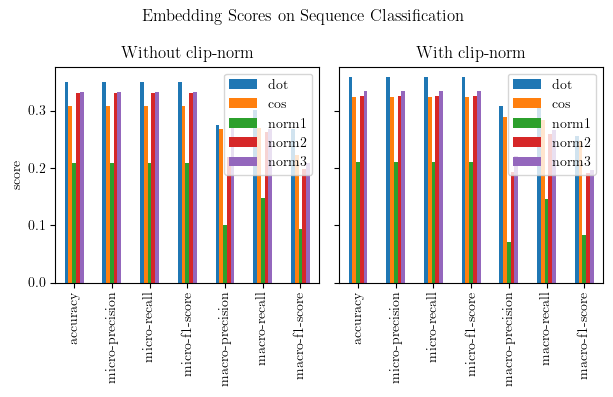

In [21]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(WIDTH, 4))

ax = axs[0]
test_stats_df.iloc[:5, :].T.plot.bar(ax=ax)
ax.set_ylabel('score')
ax.set_title('Without clip-norm')
labels = ax.get_legend_handles_labels()[1]

ax = axs[1]
test_stats_df.iloc[5:, :].T.plot.bar(ax=ax)
ax.set_title('With clip-norm')
ax.legend(labels)

fig.suptitle('Embedding Scores on Sequence Classification')
fig.tight_layout()
fig.show()

fig.savefig('all-scores.pgf')

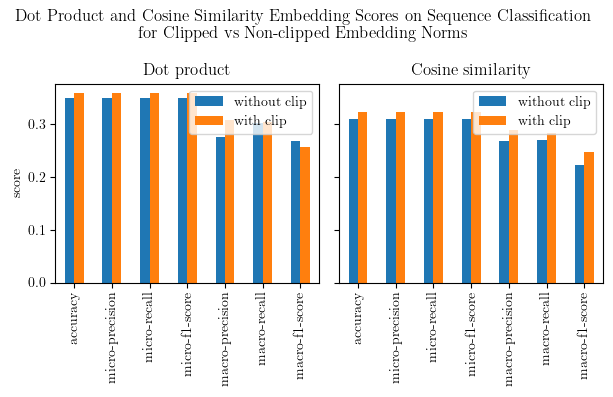

In [23]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(WIDTH, 4))

ax = axs[0]
test_stats_df.loc[['dot', 'dot_clip-norm']].T.plot.bar(ax=ax)
ax.legend(['without clip', 'with clip'])
ax.set_ylabel('score')
ax.set_title('Dot product')

ax = axs[1]
test_stats_df.loc[['cos', 'cos_clip-norm']].T.plot.bar(ax=ax)
ax.legend(['without clip', 'with clip'])
ax.set_title('Cosine similarity')

fig.suptitle('Dot Product and Cosine Similarity Embedding Scores on Sequence Classification\nfor Clipped vs Non-clipped Embedding Norms')
fig.tight_layout()
fig.show()

fig.savefig('dot-cosine_clipped-vs-non-clipped-scores.pgf')

### Latex

In [18]:
s = test_stats_df.style
s.clear()
s.format('{:.3f}')
s.format_index(escape='latex', axis=0)
s.format_index(escape='latex', axis=1)
s.to_latex()

'\\begin{tabular}{lrrrrrrr}\n & accuracy & micro-precision & micro-recall & micro-f1-score & macro-precision & macro-recall & macro-f1-score \\\\\ndot & 0.350 & 0.350 & 0.350 & 0.350 & 0.275 & 0.302 & 0.268 \\\\\ncos & 0.309 & 0.309 & 0.309 & 0.309 & 0.268 & 0.270 & 0.222 \\\\\nnorm1 & 0.209 & 0.209 & 0.209 & 0.209 & 0.100 & 0.148 & 0.093 \\\\\nnorm2 & 0.330 & 0.330 & 0.330 & 0.330 & 0.218 & 0.262 & 0.198 \\\\\nnorm3 & 0.332 & 0.332 & 0.332 & 0.332 & 0.275 & 0.268 & 0.209 \\\\\ndot\\_clip-norm & 0.359 & 0.359 & 0.359 & 0.359 & 0.308 & 0.305 & 0.256 \\\\\ncos\\_clip-norm & 0.324 & 0.324 & 0.324 & 0.324 & 0.288 & 0.283 & 0.247 \\\\\nnorm1\\_clip-norm & 0.211 & 0.211 & 0.211 & 0.211 & 0.071 & 0.145 & 0.083 \\\\\nnorm2\\_clip-norm & 0.326 & 0.326 & 0.326 & 0.326 & 0.192 & 0.259 & 0.191 \\\\\nnorm3\\_clip-norm & 0.335 & 0.335 & 0.335 & 0.335 & 0.221 & 0.266 & 0.197 \\\\\n\\end{tabular}\n'